In [57]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,StratifiedKFold

sns.set()
plt.style.use('ggplot')
%matplotlib inline

In [95]:
df=pd.read_csv(r'C:\Users\dorot\Downloads\diabetes\diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [99]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [101]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

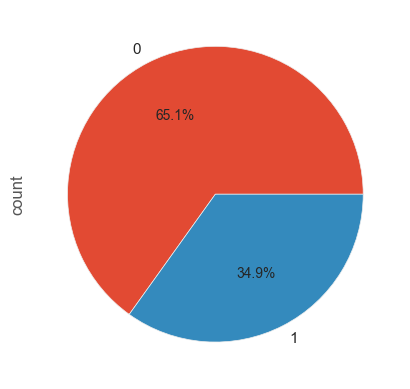

In [103]:
df['Outcome'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

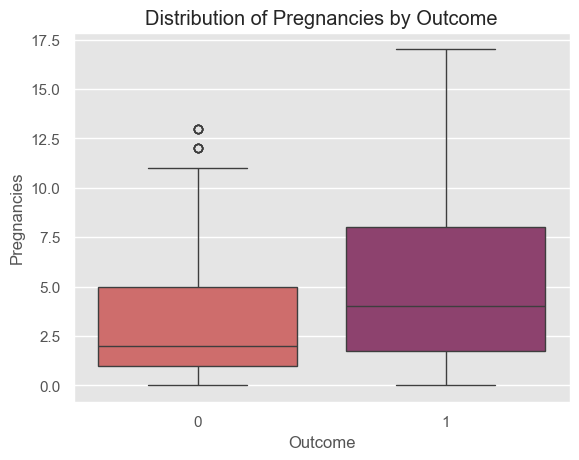

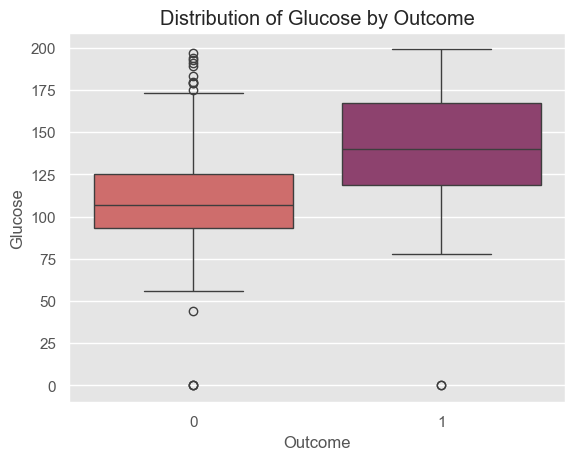

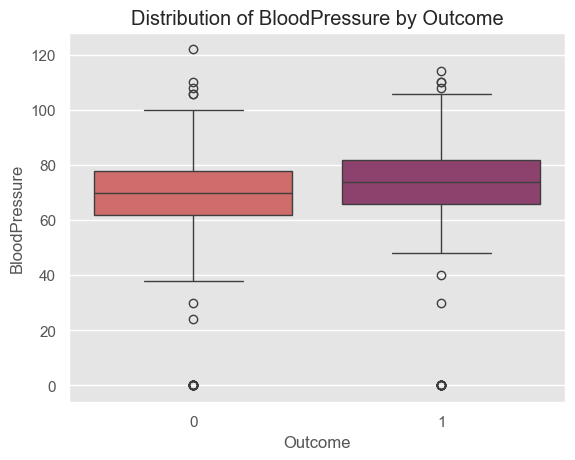

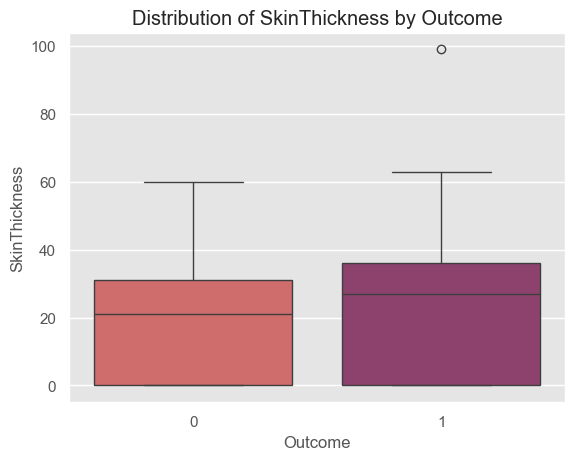

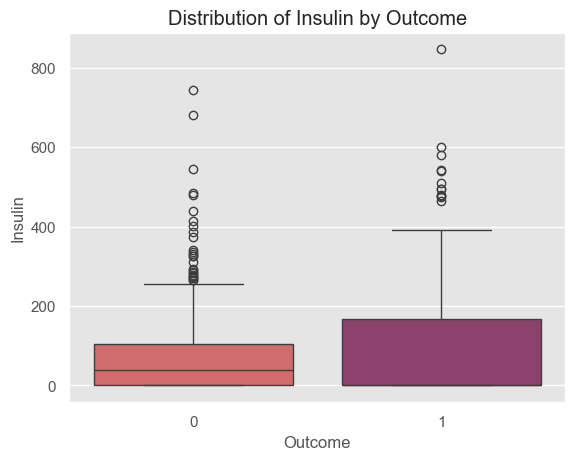

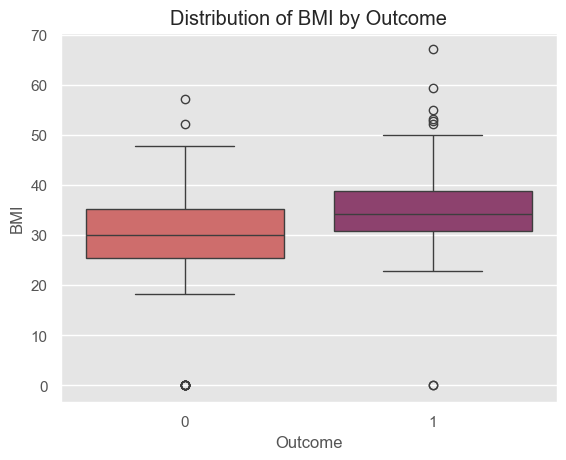

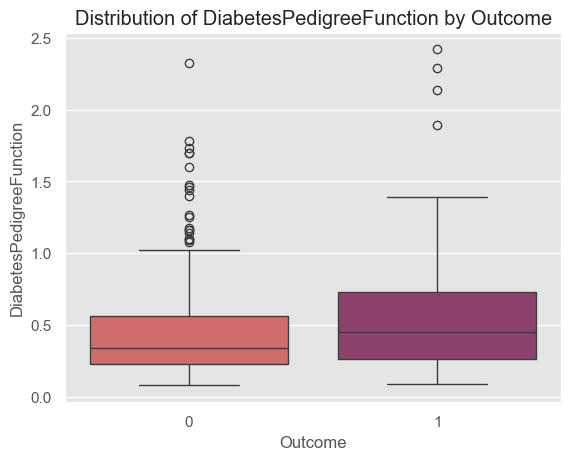

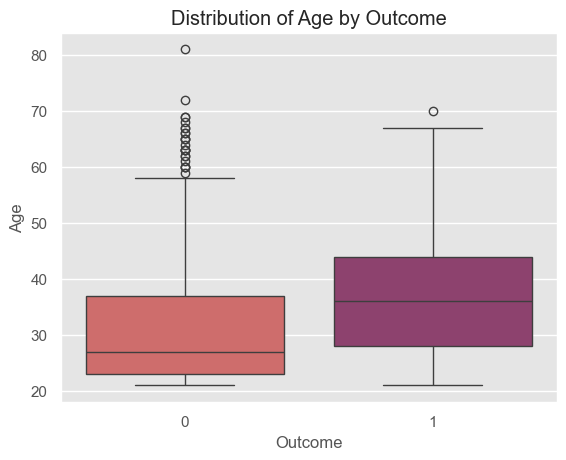

In [105]:
numeric_cols = df.columns.drop('Outcome')
numeric_cols
for col in numeric_cols:
    sns.boxplot(df, x=df['Outcome'],y=col,hue='Outcome',legend=False,palette='flare')
    plt.title(f'Distribution of {col} by Outcome')
    plt.show()

In [107]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [109]:
columns=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']
df[columns]=df[columns].replace(0,np.nan)
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [111]:
def target(x):
    temp = df[df[x].notna()]
    temp = temp.groupby('Outcome')[x].median()
    return temp

for i in columns:
    medians = target(i)
    df.loc[(df['Outcome'] == 0) & (df[i].isna()), i] = medians[0]
    df.loc[(df['Outcome'] == 1) & (df[i].isna()), i] = medians[1]

In [113]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = df[(df >= lower_bound) & (df <= upper_bound)]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               764 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             754 non-null    float64
 3   SkinThickness             681 non-null    float64
 4   Insulin                   717 non-null    float64
 5   BMI                       760 non-null    float64
 6   DiabetesPedigreeFunction  739 non-null    float64
 7   Age                       759 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [119]:
data.isnull().sum()

Pregnancies                  4
Glucose                      0
BloodPressure               14
SkinThickness               87
Insulin                     51
BMI                          8
DiabetesPedigreeFunction    29
Age                          9
Outcome                      0
dtype: int64

In [123]:
data.drop('SkinThickness',axis=1,inplace=True)
data.dropna(inplace=True)

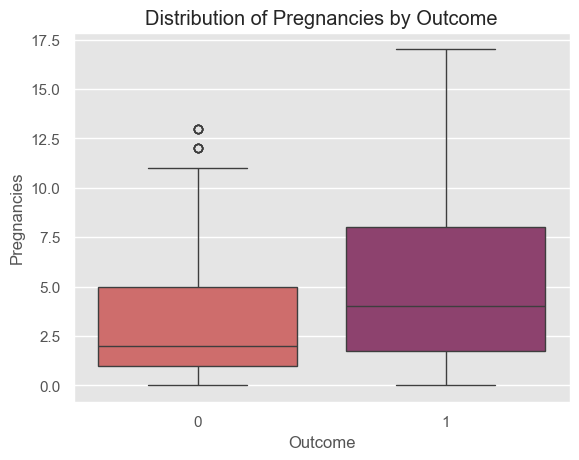

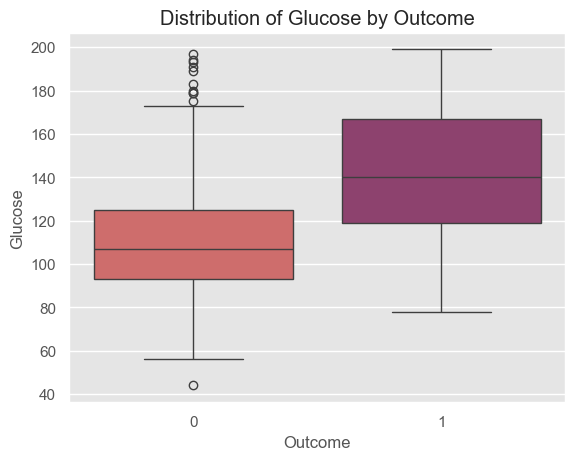

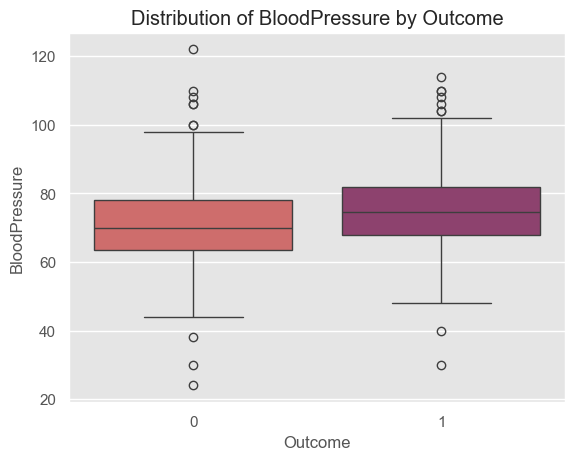

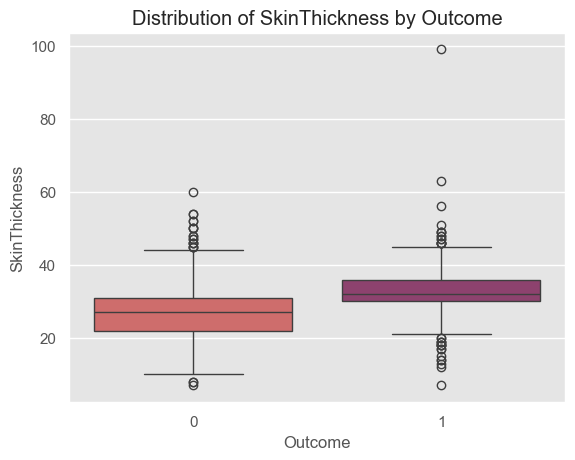

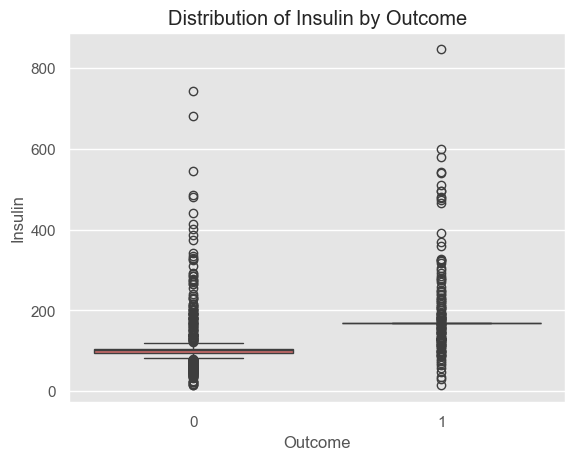

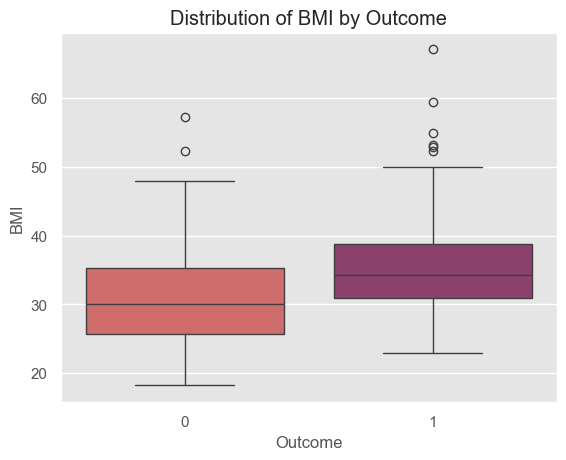

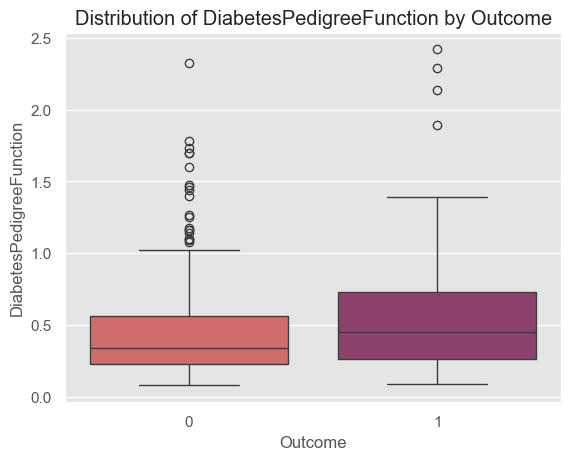

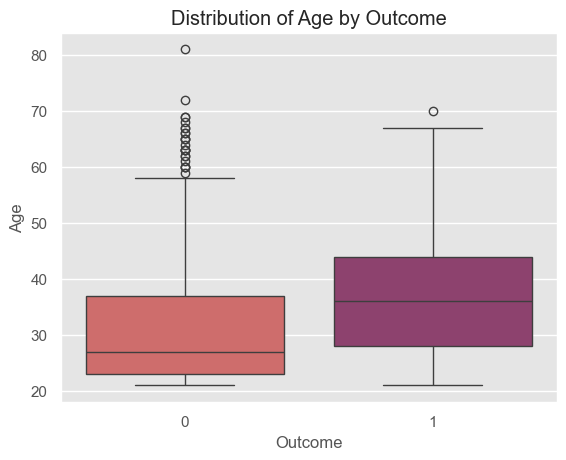

In [125]:
numeric_cols = df.columns.drop('Outcome')
numeric_cols
for col in numeric_cols:
    sns.boxplot(df, x='Outcome',y=col,hue='Outcome',legend=False,palette='flare')
    plt.title(f'Distribution of {col} by Outcome')
    plt.show()

In [127]:
data['Outcome'].value_counts()

Outcome
0    451
1    210
Name: count, dtype: int64

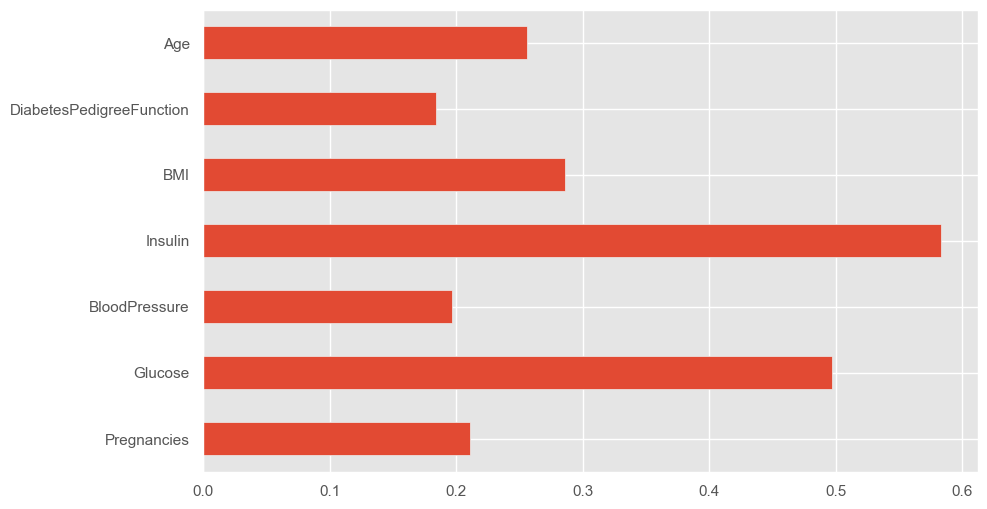

In [129]:
correlation_values = data.corr()['Outcome'].drop('Outcome')
correlation_values.plot(kind='barh', figsize=(10, 6))
plt.show()

In [131]:
data.corr()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128556,0.188784,0.140320,0.028260,0.004330,0.547366,0.210585
Glucose,0.128556,1.000000,0.247860,0.502099,0.195048,0.080166,0.301021,0.497083
BloodPressure,0.188784,0.247860,1.000000,0.156256,0.291181,0.035230,0.339803,0.196437
Insulin,0.140320,0.502099,0.156256,1.000000,0.304628,0.178323,0.229526,0.583055
BMI,0.028260,0.195048,0.291181,0.304628,1.000000,0.156216,0.073577,0.286392
DiabetesPedigreeFunction,0.004330,0.080166,0.035230,0.178323,0.156216,1.000000,0.048567,0.184307
Age,0.547366,0.301021,0.339803,0.229526,0.073577,0.048567,1.000000,0.256332
Outcome,0.210585,0.497083,0.196437,0.583055,0.286392,0.184307,0.256332,1.000000


In [175]:
X=data.drop('Outcome',axis=1)
y=data['Outcome']

In [177]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=0)

In [179]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

In [181]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print('Accuracy:', round(accuracy_score(y_test, y_pred) * 100, 2))
print(classification_report(y_test, y_pred))

[[85  6]
 [12 30]]
Accuracy: 86.47
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        91
           1       0.83      0.71      0.77        42

    accuracy                           0.86       133
   macro avg       0.85      0.82      0.84       133
weighted avg       0.86      0.86      0.86       133



In [183]:
dtc=DecisionTreeClassifier()

In [185]:
param_grid_dtc=[{
    'splitter':['best','random'],
    'max_depth':[2,4,8,12],
    'min_samples_split':[6,8,10,12],
    'criterion':['entropy','gini'],
    'class_weight': [{0: 1, 1: 2},{0: 1, 1: 3}]
}]

In [187]:
cv = StratifiedKFold(n_splits=5, shuffle=True)

In [189]:
grid_search=GridSearchCV(dtc,param_grid_dtc,cv=cv,scoring='accuracy',n_jobs=-1)
grid_search.fit(X_train,y_train)

print(grid_search.best_score_)
print(grid_search.best_params_)

0.8788858939802336
{'class_weight': {0: 1, 1: 3}, 'criterion': 'entropy', 'max_depth': 12, 'min_samples_split': 6, 'splitter': 'best'}


[[80 11]
 [ 6 36]]
Accuracy: 87.22
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        91
           1       0.77      0.86      0.81        42

    accuracy                           0.87       133
   macro avg       0.85      0.87      0.86       133
weighted avg       0.88      0.87      0.87       133



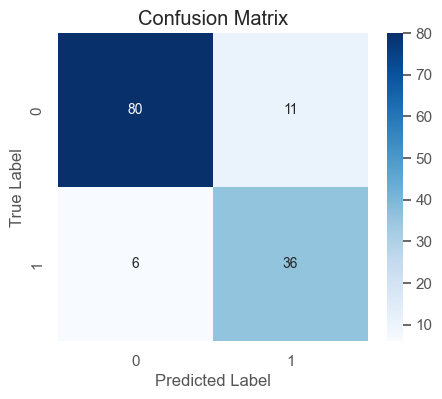

In [191]:
dtc=DecisionTreeClassifier(class_weight= {0: 1, 1: 3}, criterion= 'entropy',max_depth= 12, min_samples_split= 6, splitter= 'best')
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print('Accuracy:', round(accuracy_score(y_test, y_pred) * 100, 2))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

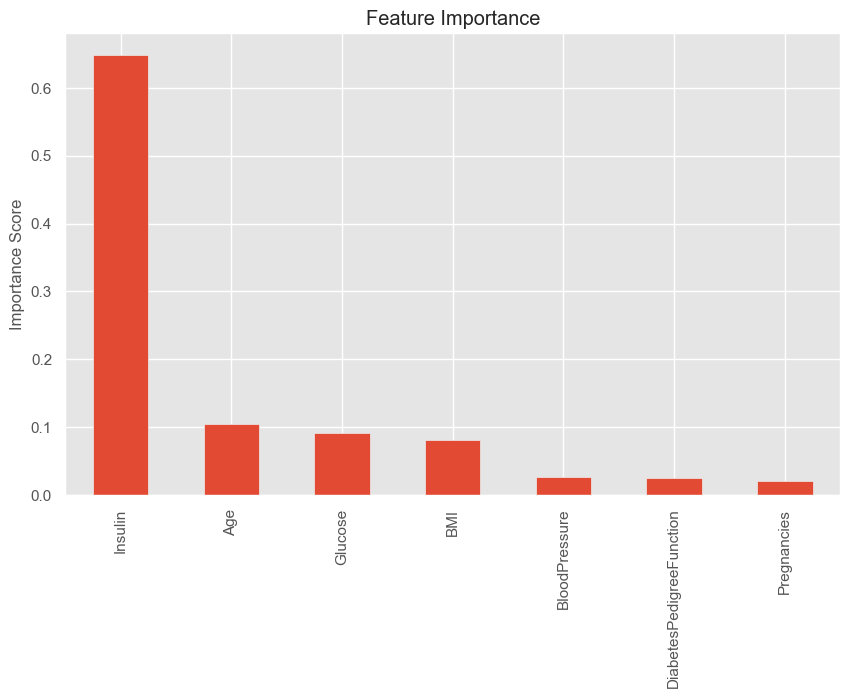

In [193]:
importances = dtc.feature_importances_
features = pd.Series(importances, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
features.plot(kind='bar')
plt.title("Feature Importance")
plt.ylabel("Importance Score")
plt.show()

In [195]:
param_grid=[{
    'n_estimators':[100,300],
    'max_depth':[2,4,8,12],
    'min_samples_split':[6,8,10,12],
    'criterion':['entropy','gini'],
    'class_weight': [{0: 1, 1: 2},{0: 1, 1: 3}]
}]

In [197]:
rf=RandomForestClassifier()

In [199]:
cv = StratifiedKFold(n_splits=5, shuffle=True)

In [201]:
grid_search=GridSearchCV(rf,param_grid,cv=cv,scoring='accuracy',n_jobs=-1)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 3}],
                          'criterion': ['entropy', 'gini'],
                          'max_depth': [2, 4, 8, 12],
                          'min_samples_split': [6, 8, 10, 12],
                          'n_estimators': [100, 300]}],
             scoring='accuracy')

In [203]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.9015453728661276
{'class_weight': {0: 1, 1: 3}, 'criterion': 'gini', 'max_depth': 12, 'min_samples_split': 6, 'n_estimators': 100}


[[85  6]
 [ 6 36]]
Accuracy: 90.98
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        91
           1       0.86      0.86      0.86        42

    accuracy                           0.91       133
   macro avg       0.90      0.90      0.90       133
weighted avg       0.91      0.91      0.91       133



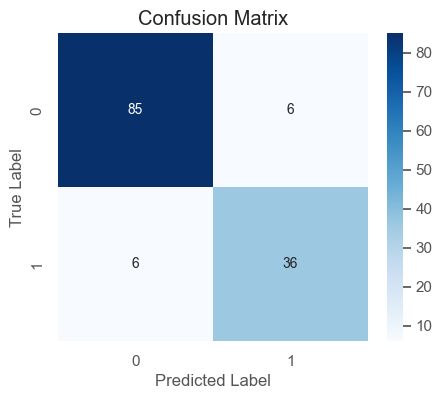

In [205]:
rf=RandomForestClassifier(class_weight= {0: 1, 1: 3}, criterion= 'gini', max_depth= 12, min_samples_split= 6, n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print('Accuracy:', round(accuracy_score(y_test, y_pred) * 100, 2))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

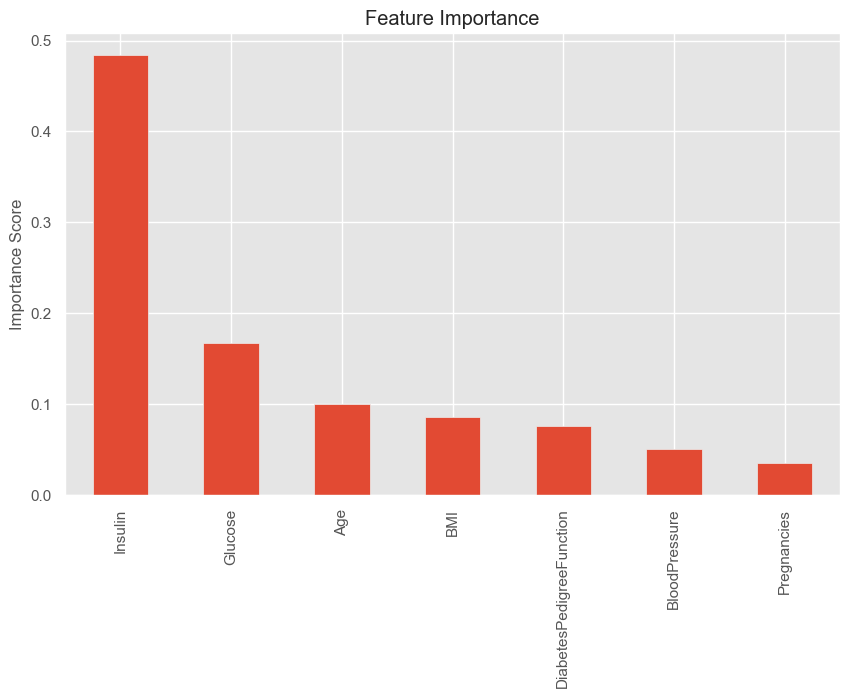

In [207]:
importances = rf.feature_importances_
features = pd.Series(importances, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
features.plot(kind='bar')
plt.title("Feature Importance")
plt.ylabel("Importance Score")
plt.show()